In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/pbp-2020.xlsx')
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2020122602,2020-12-26,2,9,44,LV,MIA,2,10,82,0,0,(9:44) (SHOTGUN) 4-D.CARR SACKED AT MIA 27 FOR...,0,2020,-9,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,NaN,0,0,0,0,0,0,NaN,18,OPP,0,NaN,0,NaN,0
1,2020122602,2020-12-26,2,9,3,LV,MIA,3,19,73,0,0,(9:03) (SHOTGUN) 30-J.RICHARD LEFT GUARD PUSHE...,0,2020,18,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT GUARD,27,OPP,0,NaN,0,NaN,0
2,2020122500,2020-12-25,3,1,17,MIN,NO,3,9,67,0,0,(1:17) (SHOTGUN) 8-K.COUSINS PASS INCOMPLETE S...,0,2020,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,33,OPP,0,NO,1,DEFENSIVE HOLDING,0
3,2020122500,2020-12-25,3,1,12,MIN,NO,1,10,82,0,0,(1:12) 8-K.COUSINS PASS INCOMPLETE DEEP LEFT T...,0,2020,0,UNDER CENTER,PASS,0,1,1,0,DEEP LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,18,OPP,1,NO,1,DEFENSIVE PASS INTERFERENCE,17
4,2020122500,2020-12-25,3,1,6,MIN,NO,1,1,99,0,0,(1:06) 69-R.HILL REPORTED IN AS ELIGIBLE. 33-...,0,2020,-3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT GUARD,1,OPP,0,NaN,0,NaN,0


In [ ]:
# link to blog
# 

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.isnull()

In [ ]:
x = pd.DataFrame(df.groupby('Down').sum()['Yards']).reset_index()
print(x)
plt.plot(x['Down'],x['Yards'])

In [ ]:
# yards by quarter
yards = pd.DataFrame(df.groupby('Quarter').sum()['Yards']).reset_index()
yards.drop(index=3)
print(yards)

<BarContainer object of 4 artists>

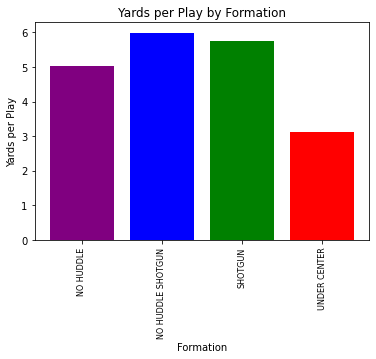

In [4]:
yardsByForm = pd.DataFrame(df.groupby('Formation').sum()['Yards'])
playsByForm = pd.DataFrame(df.groupby('Formation').count()['Yards'])
# total yards by formation
print(yardsByForm)
# how many plays ran in each formation 
print(playsByForm)
# yards per play by formation
# clean up
YPPBF = pd.DataFrame(yardsByForm/playsByForm).reset_index()
YPPBF = YPPBF.drop([0,3])
# plot
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Formation')
plt.ylabel('Yards per Play')
plt.title('Yards per Play by Formation')
plt.bar(YPPBF['Formation'], YPPBF['Yards'], color=['Purple', 'Blue', 'Green', 'Red'])

In [21]:
# run yards by formation
# get total yards 
RyardsByForm = pd.DataFrame(df.groupby(['IsRush','Formation']).sum()['Yards'])
# get count of plays
RplaysByForm = pd.DataFrame(df.groupby(['IsRush','Formation']).count()['Yards'])
# clean
RyardsByForm = RyardsByForm.drop(index=0)
RplaysByForm = RplaysByForm.drop(index=0)
# RYBF
RYBF = (RyardsByForm / RplaysByForm)
RYBF = RYBF.reset_index()
RYBF.columns

Index(['IsRush', 'Formation', 'Yards'], dtype='object')

<BarContainer object of 4 artists>

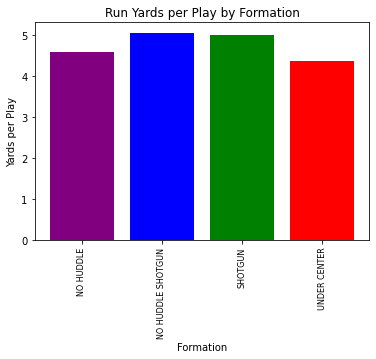

In [24]:
# plotting Run yards by formation 
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Formation')
plt.ylabel('Yards per Play')
plt.title('Run Yards per Play by Formation')
plt.bar(RYBF['Formation'],RYBF['Yards'], color=['Purple', 'Blue', 'Green', 'Red'])

In [30]:
# pass yards by formation
# getting total yards
PyardsByForm = pd.DataFrame(df.groupby(['IsPass','Formation']).sum()['Yards'])
# getting number of plays
PplaysByForm = pd.DataFrame(df.groupby(['IsPass','Formation']).count()['Yards'])
# cleaning 
PyardsByForm = PyardsByForm.drop(index=0)
PplaysByForm = PplaysByForm.drop(index=0)
# PYBF
PYBF = (PyardsByForm / PplaysByForm)
PYBF = PYBF.reset_index()
PYBF


,IsPass,Formation,Yards
0,1,NO HUDDLE,7.390756
1,1,NO HUDDLE SHOTGUN,7.214133
2,1,SHOTGUN,7.133910
3,1,UNDER CENTER,8.542763


<BarContainer object of 4 artists>

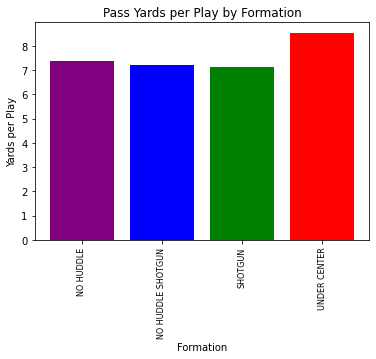

In [26]:
# plotting pass yards by formation 
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Formation')
plt.ylabel('Yards per Play')
plt.title('Pass Yards per Play by Formation')
plt.bar(PYBF['Formation'],PYBF['Yards'], color=['Purple', 'Blue', 'Green', 'Red'])

In [ ]:
pd.DataFrame(df.groupby('PlayType').sum()['Yards'])

<BarContainer object of 7 artists>

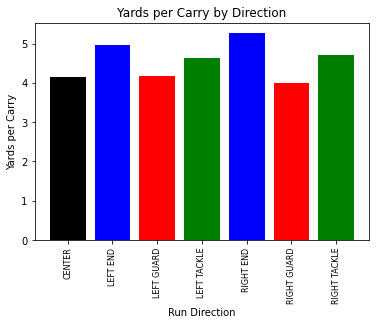

In [33]:
# run yards by direction 
# getting total yards
runDirYards = pd.DataFrame(df.groupby('RushDirection').sum()['Yards'])
# getting number of plays
runDirCoun = pd.DataFrame(df.groupby('RushDirection').count()['Yards'])
# cleaning
xyz = pd.DataFrame(runDirYards/runDirCoun).reset_index()
# plotting 
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Yards per Carry')
plt.xlabel('Run Direction')
plt.title('Yards per Carry by Direction')
plt.bar(xyz['RushDirection'], xyz['Yards'], color=['Black','Blue','Red','Green', 'Blue','Red','Green'])


In [34]:
xyz

,RushDirection,Yards
0,CENTER,4.139379
1,LEFT END,4.962677
2,LEFT GUARD,4.178893
3,LEFT TACKLE,4.640501
4,RIGHT END,5.268461
5,RIGHT GUARD,3.998206
6,RIGHT TACKLE,4.709163


In [36]:
tot = pd.DataFrame(df.groupby(['Down','IsRush']).sum())
# remove kicks and none real downs
tot = tot.drop(index=0)
# remove non rushes
tot = tot.reset_index()
tot = tot.drop(index=[0,2,4,6])
tot['Yards']

1    33984
3    20512
5     7357
7      732
Name: Yards, dtype: int64

In [37]:
CRBD = pd.DataFrame(df.groupby(['Down','IsRush']).count())
CRBD = CRBD.drop(index=0)

CRBD = CRBD.reset_index()
CRBD = CRBD.drop(index=[0,2,4,6])
CRBD['Yards']

1    7313
3    4354
5    1510
7     251
Name: Yards, dtype: int64

In [38]:
# getting yard per carry by down 
YPCBD = (tot['Yards']/CRBD['Yards'])
# get index back to downs
YPCBD = YPCBD.rename(index={1:1,3:2,5:3,7:4})
YPCBD = YPCBD.reset_index()
YPCBD = YPCBD.rename(columns={'index':'Down'})
YPCBD


,Down,Yards
0,1,4.647067
1,2,4.711070
2,3,4.872185
3,4,2.916335


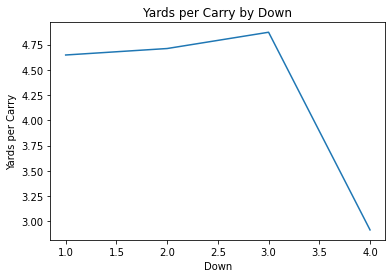

In [40]:
#plt.tick_params(axis='x',which='both',bottom=False, top=False)
plt.xlabel('Down')
plt.ylabel('Yards per Carry')
plt.title('Yards per Carry by Down')
plt.plot(YPCBD['Down'], YPCBD['Yards'])


In [15]:
PassTypes = pd.DataFrame(df.groupby('PassType').sum()['Yards'])
PassTypes = PassTypes.drop(['INTENDED FOR','INTERCEPTED BY','MIDDLE [55-FCLARK]','NOT LISTED','[58-H.LANDRY III]','MIDDLE TO','RIGHT TO'])
#PassTypes = PassTypes.reset_index()
#plt.bar(PassTypes['PassType'], PassTypes['Yards'])
PassTypes

,Yards
PassType,
DEEP LEFT,14756
DEEP MIDDLE,10591
DEEP RIGHT,17184
SHORT LEFT,35026
SHORT MIDDLE,26994
SHORT RIGHT,34935


In [ ]:
# Total yards per pass type
plt.xticks(rotation='vertical',size=8)
plt.bar(PassTypes['PassType'],PassTypes['Yards'])

In [17]:
# Count of plays for each pass type
PTcount = pd.DataFrame(df.groupby('PassType').count()['Yards'])
PTcount = PTcount.drop(['INTENDED FOR','INTERCEPTED BY','MIDDLE [55-FCLARK]','NOT LISTED','[58-H.LANDRY III]','MIDDLE TO','RIGHT TO'])
#PTcount = PTcount.reset_index
PTcount

,Yards
PassType,
DEEP LEFT,1326
DEEP MIDDLE,727
DEEP RIGHT,1436
SHORT LEFT,5611
SHORT MIDDLE,3700
SHORT RIGHT,6050


In [18]:
# Yards per play by pass type
YPPBPT = (PassTypes/PTcount)
YPPBPT = YPPBPT.reset_index()
YPPBPT


,PassType,Yards
0,DEEP LEFT,11.128205
1,DEEP MIDDLE,14.568088
2,DEEP RIGHT,11.966574
3,SHORT LEFT,6.242381
4,SHORT MIDDLE,7.295676
5,SHORT RIGHT,5.774380


<BarContainer object of 6 artists>

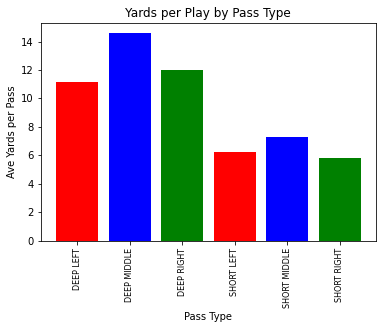

In [20]:
# plot for Yards per play by pass type 
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Pass Type')
plt.ylabel('Ave Yards per Pass')
plt.title('Yards per Play by Pass Type')
plt.bar(YPPBPT['PassType'],YPPBPT['Yards'],color=['Red','Blue','Green'])

In [23]:
# Finding completeion percentage 

# Total passes by type
TotalPlaysByType = pd.DataFrame(df.groupby('PassType').sum()['IsPass'])
TotalPlaysByType = TotalPlaysByType.drop(['INTENDED FOR','INTERCEPTED BY','MIDDLE [55-FCLARK]','NOT LISTED','[58-H.LANDRY III]','MIDDLE TO','RIGHT TO'])
#print(TotalPlaysByType)

# finding incompletions 
TotalIncomp = pd.DataFrame(df.groupby('PassType').sum()['IsIncomplete'])
TotalIncomp = TotalIncomp.drop(['INTENDED FOR','INTERCEPTED BY','MIDDLE [55-FCLARK]','NOT LISTED','[58-H.LANDRY III]','MIDDLE TO','RIGHT TO'])
#print(TotalIncomp)
#finding completions 
completionsByType = (TotalPlaysByType['IsPass'] - TotalIncomp['IsIncomplete'])
completionsByType

PassType
DEEP LEFT        553
DEEP MIDDLE      412
DEEP RIGHT       632
SHORT LEFT      4052
SHORT MIDDLE    2627
SHORT RIGHT     4137
dtype: int64

In [24]:
# completion percentage by type 
CompPercentageByType = (completionsByType / TotalPlaysByType['IsPass'])
CompPercentageByType = pd.DataFrame(CompPercentageByType)
CompPercentageByType = CompPercentageByType.reset_index()
CompPercentageByType = CompPercentageByType.rename(columns={0:'CompPercent'})

print(CompPercentageByType.columns)
print(CompPercentageByType)

Index(['PassType', 'CompPercent'], dtype='object')
       PassType  CompPercent
0     DEEP LEFT     0.417044
1   DEEP MIDDLE     0.566713
2    DEEP RIGHT     0.440111
3    SHORT LEFT     0.722153
4  SHORT MIDDLE     0.710000
5   SHORT RIGHT     0.683802


<BarContainer object of 6 artists>

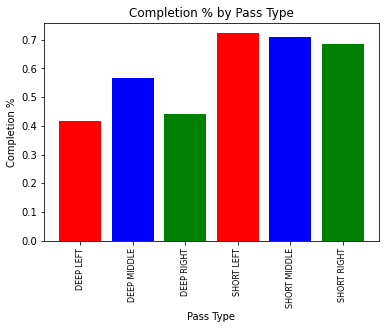

In [26]:
plt.xticks(rotation='vertical',size=8)
plt.xlabel("Pass Type")
plt.ylabel('Completion %')
plt.title('Completion % by Pass Type')
plt.bar(CompPercentageByType['PassType'],CompPercentageByType['CompPercent'], color=['Red','Blue','Green'])